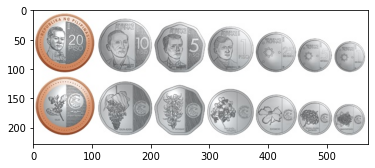

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("philcoins.jpg")
#cv2.imshow("Original", image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

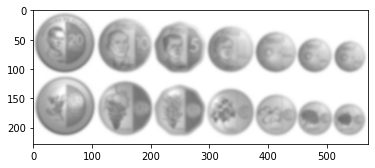

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
#cv2.imshow("Image", image)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.show()

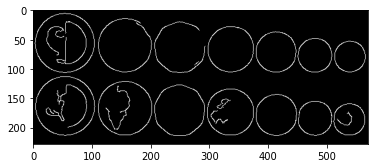

In [3]:
edged = cv2.Canny(blurred, 30, 150)
#cv2.imshow("Edges", edged)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("I count {} coins in this image ".format(len(cnts)))

I count 15 coins in this image 


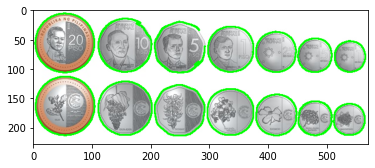

In [5]:
coins = image.copy()

cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)

#cv2.imshow("Coins", coins)
#cv2.waitKey(0)
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))
plt.show()

Coin #1


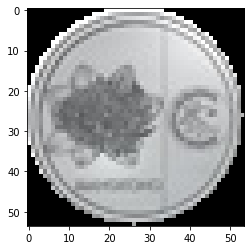

Coin #2


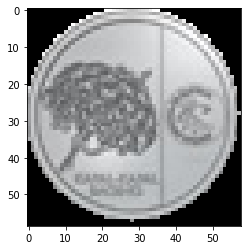

Coin #3


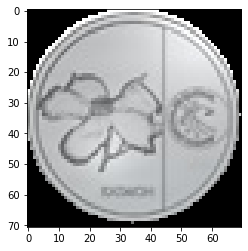

Coin #4


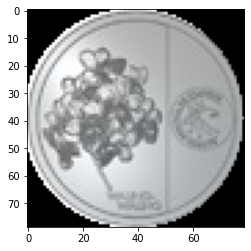

Coin #5


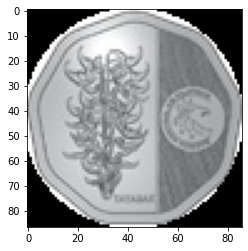

Coin #6


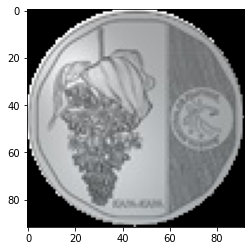

Coin #7


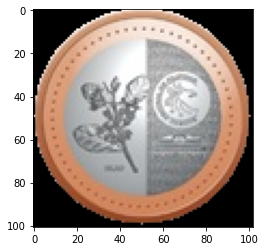

Coin #8


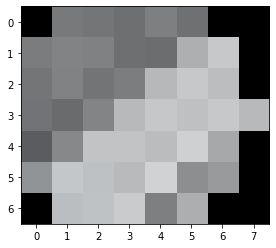

Coin #9


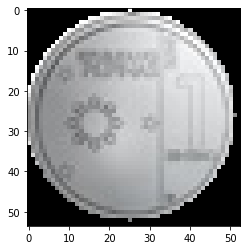

Coin #10


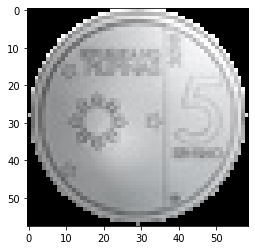

Coin #11


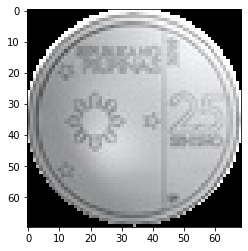

Coin #12


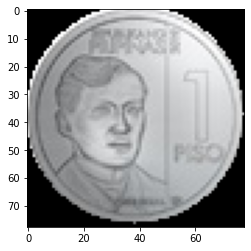

Coin #13


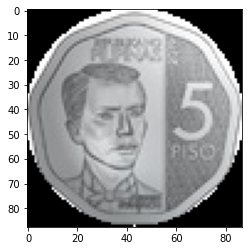

Coin #14


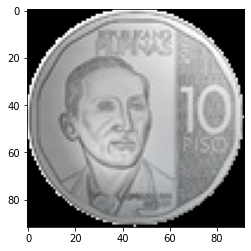

Coin #15


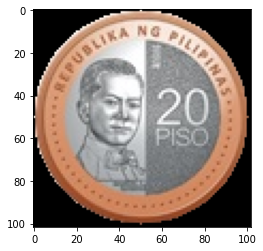

In [6]:
for (i, c) in enumerate(cnts):
    
    (x, y, w, h) = cv2.boundingRect(c)

    print("Coin #{}".format(i + 1))
    coin = image[y:y + h, x:x + w]
    #cv2.imshow("Coin", coin)

    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]

    #cv2.imshow("Masked Coin", cv2.bitwise_and(coin, coin, mask = mask))
    #cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(cv2.bitwise_and(coin, coin, mask = mask), cv2.COLOR_BGR2RGB))
    plt.show()







